In [25]:
%pip install seaborn as sns
%pip install matplotlib as plt
%pip install pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
df = pd.read_csv('trx_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1744\1421071785.py:12: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_12_months = df.last('12M')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1744\1421071785.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_12_months = df.last('12M')
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will 

Gráfico guardado como 'prediccion_ahorro_acumulado_con_area.png'


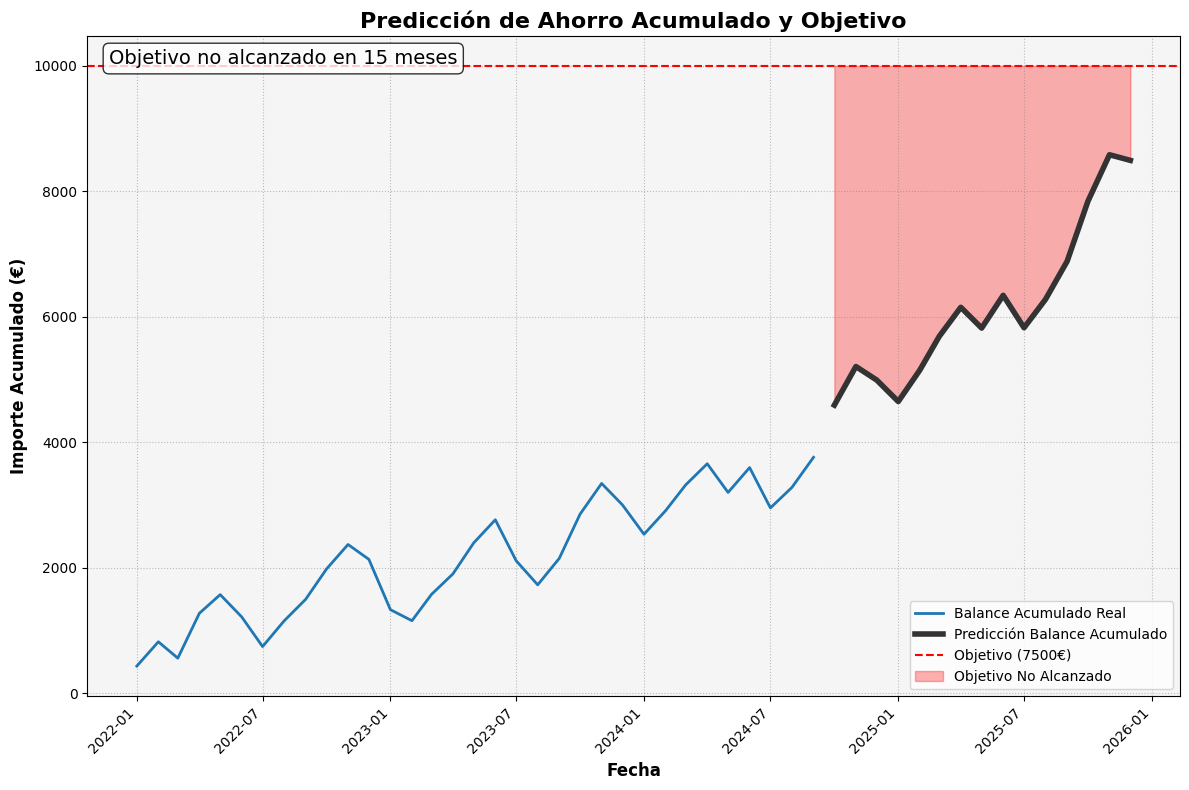


No alcanzarás tu objetivo de 10000€ en los próximos 15 meses según la predicción.
El ahorro máximo estimado es de 8583.00€.

Tu ahorro acumulado actual es de 3760.00€.


In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from datetime import datetime

# Asumiendo que df ya está cargado con los datos del CSV

df['Balance_Acumulado'] = df['BalancePOS'].cumsum()

# Ajustar modelo SARIMA a los datos de Balance de los últimos 12 meses
last_12_months = df.last('12M')
model = SARIMAX(last_12_months['BalancePOS'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generar predicción para los próximos 15 meses
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=15, freq='MS')
forecast = results.get_forecast(steps=15)
predicted_mean = forecast.predicted_mean

# Calcular el ahorro acumulado futuro
last_accumulated = df['Balance_Acumulado'].iloc[-1]
future_accumulated = np.cumsum(predicted_mean) + last_accumulated

# Crear el gráfico
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Configurar el fondo del gráfico
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# Graficar los datos históricos de balance acumulado
plt.plot(df.index, df['Balance_Acumulado'], color='#1f77b4', linewidth=2, label='Balance Acumulado Real')

# Graficar la predicción de balance acumulado
plt.plot(future_dates, future_accumulated, color='#333333', linewidth=4, label='Predicción Balance Acumulado')

# Línea de objetivo
objetivo = 10000
plt.axhline(y=objetivo, color='red', linestyle='--', label='Objetivo (7500€)')

# Verificar si se alcanza el objetivo y añadir área sombreada
if future_accumulated.max() >= objetivo:
    meses_para_objetivo = np.where(future_accumulated >= objetivo)[0][0] + 1
    objetivo_date = future_dates[meses_para_objetivo - 1]
    plt.fill_between(future_dates, objetivo, future_accumulated, where=(future_dates >= objetivo_date),
                     color='green', alpha=0.3, label='Objetivo Alcanzado')
    mensaje = f"¡Objetivo alcanzado en {meses_para_objetivo} meses!"
else:
    plt.fill_between(future_dates, objetivo, future_accumulated, color='red', alpha=0.3, label='Objetivo No Alcanzado')
    mensaje = "Objetivo no alcanzado en 15 meses"

# Configurar los ejes
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Importe Acumulado (€)', fontsize=12, fontweight='bold')
plt.title('Predicción de Ahorro Acumulado y Objetivo', fontsize=16, fontweight='bold')

# Ajustar las líneas de la cuadrícula
plt.grid(True, linestyle=':', color='gray', alpha=0.5)

# Añadir el mensaje al gráfico
plt.text(0.02, 0.98, mensaje, transform=ax.transAxes, fontsize=14, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Añadir la leyenda dentro del gráfico
plt.legend(loc='lower right')

# Ajustar el diseño
plt.tight_layout()

# Guardar el gráfico
plt.savefig('prediccion_ahorro_acumulado_con_area.png', dpi=300, bbox_inches='tight')
print("Gráfico guardado como 'prediccion_ahorro_acumulado_con_area.png'")

# Mostrar el gráfico
plt.show()

# Imprimir información adicional
if future_accumulated.max() >= objetivo:
    print(f"\n¡Felicidades! Alcanzarás tu objetivo de {objetivo}€ en aproximadamente {meses_para_objetivo} meses.")
else:
    print(f"\nNo alcanzarás tu objetivo de {objetivo}€ en los próximos 15 meses según la predicción.")
    print(f"El ahorro máximo estimado es de {future_accumulated.max():.2f}€.")

# Calcular y mostrar el ahorro actual
ahorro_actual = df['Balance_Acumulado'].iloc[-1]
print(f"\nTu ahorro acumulado actual es de {ahorro_actual:.2f}€.")